# # 모듈
---

In [2]:
import os
import glob
import shutil
import re
import json
import numpy as np
import pandas as pd
import datetime
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# # 라벨링 작업자 구문오류검수
---

In [ ]:
import os
import glob
import shutil
import re
import json
import numpy as np
import pandas as pd
import datetime

# 김성현_01 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_1/data/*'))
# 김은성_02 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_2/data/*'))
# 김재현_03 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_3/data/*'))
# 배정환_04 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_4/data/*'))
# 이종석_05 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_5/data/*'))
# 이준민_06 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_6/data/*'))
# 정성민_07 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_7/data/*'))
# 조연구_08 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_8/data/*'))
# 조준혁_09 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_9/data/*'))
# 김기록_10 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_10/data/*'))
# 김진규_11 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_11/data/*'))
# 이채민_12 = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_12/data/*'))
# test = sorted(glob.glob('/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_test/data/*'))

# 작업 후 검사용
김성현_01 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/01_김성현/*'))
김은성_02 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/02_김은성/*'))
김재현_03 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/03_김재현/*'))
배정환_04 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/04_배정환/*'))
이종석_05 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/05_이종석/*'))
이준민_06 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/06_이준민/*'))
정성민_07 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/07_정성민/*'))
조연구_08 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/08_조연구/*'))
조준혁_09 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/09_조준혁/*'))
김기록_10 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/10_김기록/*'))
김진규_11 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/11_김진규/*'))
이채민_12 = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/12_이채민/*'))
test = sorted(glob.glob('/data/NIA50/50-2/workers/data/작업후/테스트/*'))

name = input('작업자명 입력 ') # 이름_번호 입력
scene_name = input('마지막 scene 이름 입력 ')
# scene_num = int(input('scene 개수')) # 검수할 클립 개수 입력

if name == '김성현_01': scenes, dst, dst2 = 김성현_01, '/data/NIA50/50-2/workers/data/작업후/01_김성현', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_1/data'
elif name == '김은성_02': scenes, dst, dst2 = 김은성_02, '/data/NIA50/50-2/workers/data/작업후/02_김은성', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_2/data'
elif name == '김재현_03': scenes, dst, dst2 = 김재현_03, '/data/NIA50/50-2/workers/data/작업후/03_김재현', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_3/data'
elif name == '배정환_04': scenes, dst, dst2 = 배정환_04, '/data/NIA50/50-2/workers/data/작업후/04_배정환', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_4/data'
elif name == '이종석_05': scenes, dst, dst2 = 이종석_05, '/data/NIA50/50-2/workers/data/작업후/05_이종석', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_5/data'
elif name == '이준민_06': scenes, dst, dst2 = 이준민_06, '/data/NIA50/50-2/workers/data/작업후/06_이준민', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_6/data'
elif name == '정성민_07': scenes, dst, dst2 = 정성민_07, '/data/NIA50/50-2/workers/data/작업후/07_정성민', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_7/data'
elif name == '조연구_08': scenes, dst, dst2 = 조연구_08, '/data/NIA50/50-2/workers/data/작업후/08_조연구', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_8/data'
elif name == '조준혁_09': scenes, dst, dst2 = 조준혁_09, '/data/NIA50/50-2/workers/data/작업후/09_조준혁', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_9/data'
elif name == '김기록_10': scenes, dst, dst2 = 김기록_10, '/data/NIA50/50-2/workers/data/작업후/10_김민찬', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_10/data'
elif name == '김진규_11': scenes, dst, dst2 = 김진규_11, '/data/NIA50/50-2/workers/data/작업후/11_김진규', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_11/data'
elif name == '이채민_12': scenes, dst, dst2 = 이채민_12, '/data/NIA50/50-2/workers/data/작업후/12_이채민', '/data/NIA50/50-2/workers/SUSTechPOINTS_aivill_12/data'
elif name == 'test': scenes, dst = test, '/data/NIA50/50-2/workers/data/작업후/테스트'

select_scene_path = [i for i in scenes if scene_name in i][0]
last_scene_num = scenes.index(select_scene_path)


# 라벨링 파일 개수 확인
print(datetime.datetime.now().strftime('%Y.%m.%d. %r'), '\n\n')

frames = [i.zfill(4) for i in list(map(str, np.arange(10)))]
for scene in scenes[:last_scene_num+1]:
    scene_name = re.findall('[a-zA-Z0-9_]+', scene)[-1]
    
    lack_2d = []
    lack_3d = []
    empty_2d = []
    empty_3d = []
    no_same_2d = []
    no_same_3d = []

    if os.path.isdir(scene + '/2d_label') == False:
        os.makedirs(scene + '/2d_label')

    label_2d_ls = [i[:4] for i in os.listdir(scene + '/2d_label')]
    label_3d_ls = [i[:4] for i in os.listdir(scene + '/label')]
    if len(os.listdir(scene + '/2d_label')) < 10:
        lack_2d = [i for i in frames if i not in label_2d_ls]
        # print(f'2d 라벨 개수 부족: {lack_2d}')
    if len(os.listdir(scene + '/label')) < 10:
        lack_3d = [i for i in frames if i not in label_3d_ls]
        # print(f'3d 라벨 개수 부족: {lack_3d}')

    # if len(os.listdir(scene + '/2d_label')) == 10 & len(os.listdir(scene + '/label')) == 10:
    labels_2d = sorted(os.listdir(scene + '/2d_label'))
    labels_3d = sorted(os.listdir(scene + '/label'))

    # 2종류 obj_type이 설정된 obj_id 검수
    id_class_2d_ls = []
    for label_2d in labels_2d:
        with open(scene + '/2d_label/' + label_2d, 'r') as f:
            label_2d_js = json.load(f)
        if len(label_2d_js['objects']) == 0:
            empty_2d.append(label_2d[:4])

        for i in np.arange(len(label_2d_js['objects'])):
            id_2d = label_2d_js['objects'][i]['id']
            class_2d = label_2d_js['objects'][i]['class']
            id_class_2d = {'id': id_2d, 'class': class_2d}

            if id_class_2d not in id_class_2d_ls:
                id_class_2d_ls.append(id_class_2d)

                for id_class_2d_check in id_class_2d_ls:
                    if id_class_2d['id'] == id_class_2d_check['id'] and id_class_2d['class'] != id_class_2d_check['class']:
                        no_same_2d.append(int(id_class_2d['id']))


    # 2종류 obj_type이 설정된 obj_id 검수
    id_class_3d_ls = []
    for label_3d in labels_3d:
        if label_3d == '--frame--.json':
            os.remove(scene + '/label/' + label_3d)

        if os.path.isfile(scene + '/label/' + label_3d):
            with open(scene + '/label/' + label_3d, 'r') as f:
                label_3d_js = json.load(f)

            if len(label_3d_js) == 0:
                empty_3d.append(label_3d[:4])

        # frame = re.sub(".jpg", "", label_3d)

        # if len(label_3d) != len(label_2d['objects']):
        #     print(f'객체 수 불일치 프레임: {frame}')

            # print(f'2d 라벨 빈 프레임: {frame}')
            # print(f'3d 라벨 빈 프레임: {frame}')


        for i in np.arange(len(label_3d_js)):
            id_3d = label_3d_js[i]['obj_id']
            class_3d = label_3d_js[i]['obj_type']
            id_class_3d = {'id': id_3d, 'class': class_3d}

            if id_class_3d not in id_class_3d_ls:
                id_class_3d_ls.append(id_class_3d)

                for id_class_3d_check in id_class_3d_ls:
                    if id_class_3d['id'] == id_class_3d_check['id'] and id_class_3d['class'] != id_class_3d_check['class']:
                        no_same_3d.append(int(id_class_3d['id']))
                        # no_same.append({'frame': label_3d[:4], 'obj_id': id_class_3d['id']})
                        # print(f'객체명 불일치: {frame}')
                        

        # id_class_2d_ls = []
        # id_class_3d_ls = []
        # for i in np.arange(len(label_3d)):
        #     id_2d = label_2d['objects'][i]['id']
        #     class_2d = label_2d['objects'][i]['class']

        #     id_3d = label_3d[i]['obj_id']
        #     class_3d = label_3d[i]['obj_type']

        #     id_class_2d = {id_2d: class_2d}
        #     id_class_3d = {id_3d: class_3d}

        #     id_class_2d_ls.append(id_class_2d)
        #     id_class_3d_ls.append(id_class_3d)

        #     if id_class_2d_ls != id_class_3d_ls:

    
    if len(lack_2d)!=0 or len(empty_2d)!=0 or len(lack_3d)!=0 or len(empty_3d)!=0 or len(no_same_2d)!=0 or len(no_same_3d)!=0:
        # shutil.move(scene, dst2) # 작업후 폴더에서 scene 이동
        print('---------------------------------------')
        print('작업자:', name)
        print('scene:', scene_name)
        print('')
        print('< ERROR 목록 >')
        print(f'2d 라벨 - 미저장 프레임: {lack_2d}')
        print(f'2d 라벨 - 빈 프레임: {empty_2d}')
        print(f'2d 라벨 - 2종류 이상의 category가 설정된 id: {sorted(set(no_same_2d))}')
        print()
        print(f'3d 라벨 - 미저장 프레임: {lack_3d}')  
        print(f'3d 라벨 - 빈 프레임: {empty_3d}')
        print(f'3d 라벨 - 2종류 이상의 category가 설정된 id: {sorted(set(no_same_3d))}')
        print('---------------------------------------\n')

    if len(lack_2d)==0 and len(empty_2d)==0 and len(lack_3d)==0 and len(empty_3d)==0 and len(no_same_2d)==0 and len(no_same_3d)==0:
        # shutil.move(scene, dst) # 완료된 scene 이동
        print('---------------------------------------')
        print('작업자:', name)
        print('scene:', scene_name)
        print('')
        print(f'< 구문오류검수 통과 >')
        print('---------------------------------------\n')

In [ ]:
sorted(glob.glob('/data/NIA50/50-2/workers/*'))

In [ ]:
# def rej_single_res(self, target_fnum=100):
    
#     base_clip = self.get_base_clip()
#     clip = self.get_curr_clip()
#     clip_num = clip.split('_')[-2]
#     err_logger = ErrorLogger(clip)
#     res = glob.glob(f'{str(base_clip)}/result/2-048_{clip_num}_FC_???.json')
    
#     ##//=========클립 단위 counter=============
#     unique_id_set = set()
#     obj_num = 0
#     box_num = 0
#     polygon_num = 0
#     atyp_num = 0        
#     err_id = set()
#     ##//=============================
    
#     obj_dict = {}
    
#     #result 내 프레임 전체 iteration
#     for r in res:
#         with open(r, "r", encoding="utf-8") as f:
#             data = json.loads(f.read())
#             if ("frame_no" not in data) or ("annotation" not in data):
#                 err_id.add(0)
#                 print(f"{clip}: frame {0} key_error")
#                 err_logger.add_err_log(0, 0, KEY_ERROR)
#                 continue
                    
#             annot = data["annotation"]
#             fnum = int(r[-8:-5])
            
#             if annot == []:
#                 err_id.add(0)
#                 # 빈 프레임 에러
#                 print(f"{clip}: frame {fnum}: is empty")
#                 err_logger.add_err_log(fnum, -1, FRAME_ERROR)
#                 continue
#             else:
#                 # 해당 프레임 내 객체 수 
#                 obj_num += len(annot)
            
#             # 객체 단위 iteration
#             for obj in annot:
#                 id = int(obj["id"])
#                 cat = obj["category"]
#                 box_list = obj["3d_box"]
                
#                 polygon_num += len(obj["2d_polygon"])
                
#                 meta = cat  # 현재 객체 메타정보 
#                 if id in obj_dict:  # 이미 이 객체의 id가 객체 dict {id: category}에 존재한다면 
#                     if obj_dict[id] != meta:    # and id에 해당하는 객체 category와 현재 category가 다르다면
#                         err_id.add(id)          # err raise
#                         print(f"{clip}: frame {fnum}: object {id}: meta not concurrent")
#                         err_logger.add_err_log(fnum, id, META_ERROR)
#                 else:
#                     obj_dict[id] = meta
                
#                 # 3d 박스 iteration
#                 for box in box_list:
#                     loc = box["location"]
#                     dim = box["dimension"]
                    
#                     if loc[0] < -10: # x축 방향으로 가공범위 벗어난 박스 ( 원형일 경우, x^2 + y^2 < r^2 )
#                         err_id.add(id)
#                         print(f"{clip}: frame {fnum}: object {id}: wrong location")
#                         err_logger.add_err_log(fnum, id, LOC_ERROR)    
                        
#                     if cat in CATEGORY_D:
#                         x_dim = dim[0]
#                         y_dim = dim[2]    
#                         if cat in CATEGORY_CAR:
#                         ## 차량 <-> 이륜차,보행자 class에 따라 크기 err raise
                            
#                             if x_dim < 2 and y_dim < 1: # 차량 너비가 2보다 작고 길이가 1보다 작을 경우 (상수 조정 가능) 
#                                 err_id.add(id)
#                                 print(f"{clip}: frame {fnum} object {id} dimension error")
#                                 err_logger.add_err_log(fnum, id, DIM_ERROR)
                            
#                         else:
#                             if x_dim > 3 and y_dim > 2: # 보행자, 이륜차 너비가 3보다 크고 길이가 2보다 클 경우 (상수 조정 가능)
#                                 err_id.add(id)
#                                 print(f"{clip}: frame {fnum} object {id} dimension error")
#                                 err_logger.add_err_log(fnum, id, DIM_ERROR)
                                
#     err_logger.set_id_num(len(unique_id_set))
#     err_logger.set_obj_num(obj_num)
#     err_logger.set_err_num(len(err_id))
#     err_logger.set_err_id_set(err_id)
#     obj_dict = {}
#     print(err_id)
#     return err_logger

# # 작업완료 박스 개수 확인
---

In [ ]:
path = '/data/NIA50/50-2/workers/data/작업후/'
workers = sorted(os.listdir(path))

for worker in workers[:-1]:
    labels_3d = sorted(glob.glob(path+worker+'/*/label/*.json'))
    # print(labels_3d)
    num_cuboid = 0
    for label_3d in labels_3d:
        with open(label_3d, 'r') as f:
            label_js = json.load(f)
            num_cuboid+=len(label_js)
    
    print(f'{worker} 박스 작업 개수 : {num_cuboid}')

# # 폴더 이동
---

In [23]:
scenes = sorted([re.findall('[a-zA-Z0-9_]+', j)[-1] for j in glob.glob('/NIA50/50-2/data/라벨데이터/*/*/*/*')])[1:]

for scene in scenes:
    if glob.glob(f'/NIA50/50-2/data/라벨데이터/*/*/*/{scene}/label'):
        src = glob.glob(f'/NIA50/50-2/data/라벨데이터/*/*/*/{scene}/label')[0]
        dst = glob.glob(f'/NIA50/50-2/data/전체데이터/*/*/*/{scene}')[0]

        if os.path.exists(dst+'/label')==False:
            shutil.move(src, dst)

In [27]:
scenes = sorted(glob.glob('/NIA50/50-2/data/전체데이터/*/*/*/*'))

for scene in scenes:
    if os.path.exists(scene):
        dst = '/NIA50/50-2/data/nia50_all/raw'
        shutil.move(scene, dst)

In [18]:
scenes = sorted(glob.glob('/NIA50/50-2/data/nia50_all/raw/2211_pangyo_C_D/*/2d_label'))

for scene in scenes:
    scene_name = re.findall('[a-zA-Z0-9_]+', scene)[-2]

    dst = glob.glob(f'/NIA50/50-2/data/nia50_all/raw/{scene_name}')[0]
    if os.path.exists(dst+'/2d_label')==False:
        shutil.move(scene, dst)

# # 폴더오류
---

In [27]:
scenes = sorted(glob.glob('/NIA50/50-2/data/nia50_all/raw/*'))
dst = '/NIA50/50-2/data/하자데이터/폴더개수부족'

for scene in scenes:
    fol_len = len(os.listdir(scene))
    if fol_len < 5:
        shutil.move(scene, dst)

In [5]:
scenes = sorted(glob.glob('/NIA50/50-2/data/nia50_all/raw/*'))
dst = '/NIA50/50-2/data/하자데이터/폴더오류/폴더구조오류'

for scene in scenes:
    # fol_len = len(os.listdir(scene))
    if os.listdir(scene) != ['calib', 'label', 'lidar', '2d_label', 'camera']:
        shutil.move(scene, dst)

# # 라벨링내용없음
---

In [54]:
scenes = sorted(glob.glob('/NIA50/50-2/data/nia50_all/raw/*'))
dst = '/NIA50/50-2/data/하자데이터/라벨링내용없음'

for scene in scenes:
    labels_2d = sorted(glob.glob(f'{scene}/2d_label/*.json'))
    labels_3d = sorted(glob.glob(f'{scene}/label/*.json'))

    label_2d_obj_num = []
    label_3d_obj_num = []

    for label_2d in labels_2d:
        with open(label_2d, 'r') as f:
            label_2d = json.load(f)
        label_2d_obj_num.append(len(label_2d))
    
    for label_3d in labels_3d:
        with open(label_3d, 'r') as f:
            label_3d = json.load(f)
        label_3d_obj_num.append(len(label_3d))

    if 0 in set(label_2d_obj_num) or 0 in set(label_3d_obj_num):
        shutil.move(scene, dst)

In [6]:
len(os.listdir('/NIA50/50-2/data/하자데이터/라벨링내용없음'))

2095

In [8]:
len(os.listdir('/NIA50/50-2/data/하자데이터/폴더오류/폴더개수부족'))

2674

In [9]:
len(os.listdir('/NIA50/50-2/data/nia50_all/raw'))

3340

# # 가끔 실제로 라벨링할 객체가 없음
---

In [8]:
scenes = sorted(glob.glob('/NIA50/50-2/data/하자데이터/라벨링내용없음/*'))
dst = '/NIA50/50-2/data/하자데이터/가끔실제로라벨링할객체가없음'

for scene in scenes:
    labels_2d = sorted(glob.glob(f'{scene}/2d_label/*.json'))
    labels_3d = sorted(glob.glob(f'{scene}/label/*.json'))

    label_2d_obj_num = []
    label_3d_obj_num = []

    for label_2d in labels_2d:
        with open(label_2d, 'r') as f:
            label_2d = json.load(f)
        label_2d_obj_num.append(len(label_2d['objects']))
    
    for label_3d in labels_3d:
        with open(label_3d, 'r') as f:
            label_3d = json.load(f)
        label_3d_obj_num.append(len(label_3d))

    if len(set(label_2d_obj_num)) > 1 and len(set(label_3d_obj_num)) > 1:
        shutil.move(scene, dst)

# # 중복폴더 구조
---

In [2]:
path = '/data/NIA50/50-2/data/NIA50/train_1st/raw/'
clips = sorted(os.listdir(path))

dub_fld = []
for clip in clips:
    if os.path.isdir(path+clip+f'/{clip}') == True:
        dub_fld.append(clip)
        # print(clip)

In [1]:
# 폴더 재졍렬
for fld in dub_fld:
    inner_path = path + fld + '/' + fld
    if os.path.isdir(inner_path):
        for inner_fld in sorted(os.listdir(inner_path)):
            if os.path.isdir(inner_path + '/' + inner_fld) == False:
        #         shutil.move(inner_path + '/' + inner_fld, path+fld)
        # shutil.rmtree(inner_path)

SyntaxError: incomplete input (3251426110.py, line 8)

# # 2d_label
---

## # 폴더 결손
---

In [ ]:
# 2d_label 폴더가 존재하지 않음

path = '/data/NIA50/50-2/data/NIA50/train_1st/'
clips = sorted(os.listdir(path))

non_2d_label = []
for clip in clips:
    if os.path.isdir(path+clip+f'/2d_label') == False:
        non_2d_label.append(clip)
        # print(clip)

In [ ]:
# 중복 폴더 구조에 들어가 있는 2d_label 폴더 확인

path = '/data/NIA50/50-2/data/NIA50/train_1st/'
clips = sorted(os.listdir(path))

dub_fld_2d_label = []
for clip in clips:
    if os.path.isdir(path+clip+f'/{clip}/2d_label') == True:
        dub_fld_2d_label.append(clip)
        # print(clip)

## # 2d 라벨링 파일 개수 부족
---

In [ ]:
path = '/data/NIA50/50-2/data/NIA50/train_1st/'
clips = sorted(os.listdir(path))

insuff_label = []
for clip in clips:
    if os.path.isdir(path+clip+'/2d_label') == True:
        if len(os.listdir(path+clip+'/2d_label')) < 10:
            insuff_label.append(clip)
            print(clip)

    if os.path.isdir(path+clip+f'/{clip}/2d_label') == True:
        if len(os.listdir(path+clip+f'/{clip}/2d_label')) < 10:
            insuff_label.append(clip)
            print(clip)

## # 2d 라벨링 데이터 미입력
---

In [ ]:
path = '/data/NIA50/50-2/data/NIA50/train_1st/'
clips = sorted(os.listdir(path))

no_label = []
for clip in clips:
    if os.path.isdir(path+clip+'/2d_label') == True:
        if len(os.listdir(path+clip+'/2d_label')) == 10:
            labels_2d = sorted(os.listdir(path+clip+'/2d_label'))

            for label_2d in labels_2d:
                label_2d_path = path+clip+f'/2d_label/{label_2d}'
                with open(label_2d_path, 'r') as f:
                    label_js = json.load(f)
                    
                    if len(label_js['objects']) == 0:
                        no_label.append(clip)
                        # print(f'clip: {clip}, 2d_label: {label_2d}')


    if os.path.isdir(path+clip+f'/{clip}/2d_label') == True:
        if len(os.listdir(path+clip+f'/{clip}/2d_label')) == 10:
            labels_2d = sorted(os.listdir(path+clip+f'/{clip}/2d_label'))

            for label_2d in labels_2d:
                label_2d_path = path+clip+f'/{clip}/2d_label/{label_2d}'
                with open(label_2d_path, 'r') as f:
                    label_js = json.load(f)
                    
                    if len(label_js['objects']) == 0:
                        no_label.append(clip)
                        # print(f'clip: {clip}, 2d_label: {label_2d}')

for i in sorted(set(no_label)):
    print(i)

In [ ]:
[i for i in non_2d_label if i not in dub_fld_2d_label]

In [ ]:
for i in sorted(insuff_label + list(set(no_label)) + [i for i in non_2d_label if i not in dub_fld_2d_label]):
    print(i)

# # calib 불일치
---

In [ ]:
extrinsic_ls = []
intrinsic_ls = []
for calib in sorted(glob.glob('/data/NIA50/50-2/data/NIA50/train_1st/*/calib/camera/camera_0.json')):
    clip = re.search('[a-z_]*Suwon[_a-zA-Z0-9]+', calib).group()

    with open(calib, 'r') as js:
        js = json.load(js)

    extrinsic_ls.append({clip: js['extrinsic']})
    intrinsic_ls.append({clip: js['intrinsic']})

extrinsic_check = []
for extrinsic in extrinsic_ls:
    extrinsic = list(extrinsic.values())[0]
    if extrinsic not in extrinsic_check:
        extrinsic_check.append(extrinsic)

intrinsic_check = []
for intrinsic in intrinsic_ls:
    intrinsic = list(intrinsic.values())[0]
    if intrinsic not in intrinsic_check:
        intrinsic_check.append(intrinsic)

In [ ]:
for i in range(len(extrinsic_check)):
    globals()[f'ex{i}'] = []

    for extrinsic in extrinsic_ls:
        if list(extrinsic.values())[0] == extrinsic_check[i]:
            globals()[f'ex{i}'].append(list(extrinsic.keys())[0])

In [ ]:
len(ex0), len(ex1), len(ex2)

In [ ]:
ex2

In [ ]:
for i in range(len(extrinsic_check)):
    globals()[f'ex{i}'] = []

    for extrinsic in extrinsic_ls:
        if list(extrinsic.values())[0] == extrinsic_check[i]:
            globals()[f'ex{i}'].append(list(extrinsic.keys())[0])

In [ ]:
for i in range(len(intrinsic_check)):
    globals()[f'in{i}'] = []

    for intrinsic in intrinsic_ls:
        if list(intrinsic.values())[0] == intrinsic_check[i]:
            globals()[f'in{i}'].append(list(intrinsic.keys())[0])

In [ ]:
len(in0), len(in1), len(in2)


## # 이미지 유사도 사용하여 calib 맞추기
---

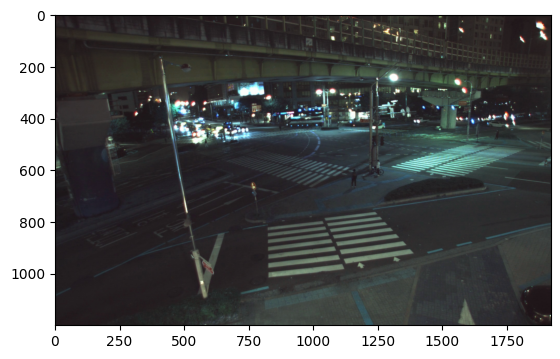

In [8]:
# 이미지 유사도 측정

standard1 = '/data/NIA50/50-2/data/NIA50/train_1st/raw/Suwon_A_2210261926_0313/camera/camera_0/0000.jpg'
standard2 = '/data/NIA50/50-2/data/NIA50/train_1st/raw/Suwon_B_2211121422_0184/camera/camera_0/0000.jpg'
standard3 = '/data/NIA50/50-2/data/NIA50/train_1st/raw/Suwon_B_2210272049_0022/camera/camera_0/0000.jpg'
# img_standard1 = cv2.imread(standard1+'camera/camera_0/0000.jpg')
# img_standard2 = cv2.imread(standard2+'camera/camera_0/0000.jpg')

plt.imshow(cv2.imread(standard3))

In [9]:
# plt.imshow(img1)
# imgs = [img2, img1, img_test]

imgs = [standard3] + sorted(glob.glob('/data/NIA50/50-2/data/NIA50/train_1st/raw/*/camera/camera_0/0000.jpg'))
hists = []
scene_names = []
for i, img in enumerate(imgs) :
    scene_name = re.findall('[a-zA-Z0-9_]+', img)[-5]
    img = cv2.imread(img)
    # plt.subplot(1,len(imgs),i+1)
    # plt.title(f'img{i+1}')
    # plt.axis('off') 
    # plt.imshow(img)``
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)
    scene_names.append(scene_name)


query = hists[0]
# methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
#            'INTERSECT':cv2.HISTCMP_INTERSECT,
#            'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
methods = {'CORREL' :cv2.HISTCMP_CORREL,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
# for j, (name, flag) in enumerate(methods.items()):

for j, (name, flag) in enumerate(list(methods.items())[:1]):
    # print(f'%-10s'%name, end='\t')
    print(f'{name}\n')
    # for i, (hist, img) in enumerate(zip(hists, imgs)):
    for i, (hist, scene_name) in enumerate(zip(hists, scene_names)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        # print("img%d:%7.2f"%(i+1, ret), end='\t')
        print(f'{scene_name}: {np.around(ret, 2)}')

        try:
            if ret > 0.5:
                src = f'/data/NIA50/50-2/data/NIA50/train_1st/raw/{scene_names[0]}/calib/camera/camera_0.json'
                dst = f'/data/NIA50/50-2/data/NIA50/train_1st/raw/{scene_name}/calib/camera/camera_0.json'
                if os.path.isdir(f'/data/NIA50/50-2/data/NIA50/train_1st/raw/{scene_name}/calib/camera/')==False:
                    os.makedirs(f'/data/NIA50/50-2/data/NIA50/train_1st/raw/{scene_name}/calib/camera/')
                shutil.copyfile(src, dst)
        except shutil.SameFileError:
            pass

    print()
# plt.show()

CORREL

Suwon_B_2210272049_0022: 1.0
Suwon_A_2210261635_0000: 0.51
Suwon_A_2210261635_0039: 0.51
Suwon_A_2210261635_0062: 0.48
Suwon_A_2210261635_0069: 0.48
Suwon_A_2210261635_0101: 0.5
Suwon_A_2210261635_0102: 0.5
Suwon_A_2210261635_0103: 0.49
Suwon_A_2210261635_0104: 0.5
Suwon_A_2210261635_0105: 0.48
Suwon_A_2210261635_0106: 0.47
Suwon_A_2210261635_0107: 0.5
Suwon_A_2210261635_0108: 0.47
Suwon_A_2210261635_0109: 0.47
Suwon_A_2210261635_0110: 0.47
Suwon_A_2210261635_0111: 0.48
Suwon_A_2210261635_0112: 0.48
Suwon_A_2210261635_0113: 0.49
Suwon_A_2210261635_0117: 0.45
Suwon_A_2210261635_0118: 0.48
Suwon_A_2210261635_0119: 0.49
Suwon_A_2210261635_0120: 0.47
Suwon_A_2210261635_0121: 0.47
Suwon_A_2210261635_0122: 0.46
Suwon_A_2210261635_0123: 0.47
Suwon_A_2210261635_0124: 0.49
Suwon_A_2210261635_0125: 0.42
Suwon_A_2210261635_0126: 0.44
Suwon_A_2210261635_0127: 0.46
Suwon_A_2210261635_0128: 0.43
Suwon_A_2210261635_0129: 0.45
Suwon_A_2210261635_0130: 0.4
Suwon_A_2210261635_0131: 0.45
Suwon_A_